# Project 1 Programming for Data Analysis Winter 2023 

**Author: Nur Bujang**

project1.ipynb
***

### Project Instruction:

> Using numpy.random package, generate at least one-hundred data points across at least four different variables. Synthesise/simulate a data set as closely matching their properties as possible.

>  Investigate the types of variables involved, their likely distributions, and their relationships with each other. Figure out what the variable should look like, the type of distribution for each, and relationship between the variable (what is the reasonable model of the real-world phenomenon, and how it would be distributed).

> Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.

> The README need only contain an explanation of what is contained in the repository and how to run the Jupyter notebook. 

> The notebook should contain the main body of work and should list all references used in completing the project.

# **Project Title: Optimization of Recombinant CHO Cell Culture in a Miniature Bioreactor Model**

## Abstract

The goal of this project is to use data analysis and machine learning techniques to simulate a real-world suation in the biopharmaceutical industry, where recombinant Chinese Hamster Ovary cells containing monoclonal antibodies (mAbs) are being grown under controlled conditions in bioreactors. Hypothetically, through a simulation study, if a problem occurs within the controlled conditions, the user will be able to minimize the damage or loss quickly with strategically-guided decisions, thus, preventing a waste of resources to maximize profit.

The observed dataset comprises of four independent variables (temperature, dissolved oxygen, glucose concentration and lactate concentration) to determine the optimum conditions for growing recombinant CHO cells. The dependent variable is the final viable cell density. Based on the distribution of observed dataset, the simulated dataset was randomly generated using numpy.random package and scipy.stat and later compared using Distribution Plots. The probability distribution for temperature, dissolved oxygen, glucose, lactate and final viable density derived from observed data were Log Gamma, Double Weibull, Generalized Extreme Value, Generalized Extreme Value, and Exponential Distribution, respectively.

However, the simulated model would model dissolved oxygen, glucose and lactate in a Normal Distribution to match real life situations in a bioreactor. Further analysis performed on the simulated dataset include Distribution Plots, Scatter Plot, Box Plot, Violin Plot, Pearson Correlation and Multiple Linear Regression.

## 1.0 Background

### 1.1 Monoclonal Antibodies

Monoclonal antibodies (mAbs) are the most profitable therapeutic proteins on the market (Ho et al., 2013). Some examples of mAbs are DARZALEX® (daratumumab) by Johnson & Johnson for multiple myeloma (Content Lab U.S., 2015), ZIRABEV™ (bevacizumab-bvzr), RUXIENCE™ (rituximab-pvvr) and TRAZIMERA™ (trastuzumab-qyyp) by Pfizer for cancer (www.pfizer.com, 2020) and  KEYTRUDA® (pembrolizumab) by Merck Sharp & Dohme (MSD) for cancer treatment (MSD Connect UK, 2022). MAbs are highly specific and each only binds to a specific protein on a cell (www.cancerresearchuk.org, 2021). Depending on the target protein, it will either attack cancer cells directly, flag cancer cells for destruction by the body's immune system or deliver toxins straight to cancer cells (Mayo Clinic, 2019, Malik and Ghatol, 2023). Patient therapy requires high doses of mAbs over a long period of time, thus increasing its market demand constantly (Li et al., 2004).

<img src="https://www.researchgate.net/publication/366690611/figure/fig1/AS:11431281110227336@1672404820275/Structure-of-monoclonal-antibody-and-its-components-Structure-of-monoclonal-antibodies.png" alt="Monoclonal Antibody Structure" width="700" height="300"/>


### 1.2 Monoclonal Antibody Production Technologies

According to Schofield (2023), current commercial mAb manufacturing methods are hybridoma technique, phage display, single B cell technology and recombinant DNA technology, with the latter being the most popular. Recombinant monoclonal antibody mass-production involves inserting select functional gene regions into expression vector into mammalian or bacterial cell cultures (Schofield, 2023). 

Recently, DeLuca, Mick and DeLuca (2022) reported a method to produce recombinant monoclonal antibodies from human cells at a considerably low cost. However, currently, the currently preferred host for recombinant mAb production are Chinese Hamster Ovary (CHO cells) mammalian cells due to their ability to produce complex proteins with post-translational modifications, high productivity and ease-of-use in large scale cell culture (Eberle, 2023). 

<img src="https://www.researchgate.net/profile/Alfred-Stett/publication/6895082/figure/fig2/AS:280362598060032@1443855060170/Cytocentered-Chinese-hamster-ovary-CHO-cell-placed-on-a-suction-opening-with-12-m-m.png" width="450" height="400"/>

### 1.3 Large-Scale Recombinant Monoclonal Antibody Manufacturing Process

According to Vázquez-Rey and Lang (2011), a standard recombinant mAb manufacturing process using mammalian cell culture includes growing seed culture (inoculum) in fermentation tanks, followed by large-scale production of up to 20,000 L in bioreactors, cell harvest/primary recovery, product purification and finally product formulation. 

Because of the increasing demand in human and animal therapy, new strategies and technologies are continually being developed to maximize cell culture productivity (Rodrigues et al., 2009, Singh et al., 2015, Kunert and Reinhart, 2016). This includes upgraded bioreactors with higher capacities (Rodrigues et al., 2009), disposable bioreactors (Zhao et al., 2014) and advances in proteomics to produce high quality mAbs (Steinhoff et al., 2016, Jyothilekshmi and Jayaprakash, 2021). 

### 1.4 Optimization of CHO Cell Culture Conditions in Bioreactors

According to Rodrigues et al. (2009), factors that affect cell production are temperature, pH, osmolality, dissolved oxygen, carbon dioxide (CO<sub>2</sub>), nutrient and metabolites concentration. Optimized temperature, pH, dissolved oxygen, CO<sub>2</sub> and nutrient and metabolites concentration are growth factors for CHO cells while high osmolality and lactate inhibit cell growth. Attributes of specific protein productivity include cell size, cell volume and viable cell density (Alhuthali, Kotidis and Kontoravdi, 2021). 

It is crucial for these culture conditions to be optimized to maintain a consistent glycosylation profile, which is a critical protein quality trait to ensure proper protein conformation and maintain product integrity and efficacy (Masayoshi Onitsuka et al., 2014, Jennewein and Alter, 2017, Li et al., 2010, 2019, 2022, Reddy et al., 2023).

![Industrial bioreactors ,  Pharmaceutical Technology (2003)](https://www.pharmaceutical-technology.com/wp-content/uploads/sites/24/2017/09/CHUGAI-1.jpg)

### 1.5 Factors Affecting CHO Cell Growth

While Li et al. (2022) stressed the importance of optimization throughout all stages of genetic modification, expression vector, cell line modification finally production process in recombinant protein production, in this study, I will only focus on the optimization of cell growth conditions in a miniature bioreactor model. For this purpose, I will select four major determinants in cell growth; temperature, dissolved oxygen, glucose concentration and lactate concentration. The dependent variable is final viable cell density (FVCD). 

#### **1.5.1 Temperature**

Although CHO cells are usually grown at 37°C (Becerra et al., 2012, Xu et al., 2019),  temperature shift (TS) to a hypothermic condition of 25–35°C have been shown to produce cell growth (Al-Fageeh et al., 2006). Sunley, Tharmalingam and Butler (2008) reported a CHO cell population which has adapted to growing at 32°C for 300 days while maintaining high level of cell-specific recombinant protein. Fan et al. (2010) and Kou et al. (2011) reported 3-fold and 5-fold increase of mAb productivity at  30°C compared to that of 37°C. Meanwhile, Jenkins and Hovey (1993) reported significantly increased protein yield from CHO cells at alternating temperatures between 34°C and 39°C. 

#### **1.5.2 Dissolved Oxygen**

According to Zakrzewski, Lee and Lye (2022), fluctuations in dissolved oxygen (DO) tension between 10%–30% decreased cell growth by 35%. Fluctuations in DO resulted in increased lactate accumulation (Hippach et al., 2018). Restelli et al. (2006) found that under hyperoxic condition of 200% DO, the final viable cell yield was significantly lower than normoxic condition at 50% DO. 

#### **1.5.3 Glucose Concentration**

Dowd, Kwok and Piret (2001) and Meuwly et al. (2006b) proposed the use of glucose consumption rate (GCR) as a process monitoring tool to indicate medium utilization in cell cultures in bioreactors. López-Meza et al., (2016) found that recombinant CHO cells did not exhibit a lag-phase even at the lowest glucose concentration. Vergara et al. (2018) later reported that high feed glucose limits cell growth, but improves specific protein productivity in CHO cells significantly. Hence, it is important to find the right balance during the optimization process of recombinant cell production.

#### **1.5.4 Lactate Concentration**

While lactate is a waste product of cell growth and high levels of lactate has negative effects on cell growth (Zhou et al., 2011), Li et al. (2011) found that incorporating lactate in the culture medium could be beneficial in minimizing ammonia accumulation, thus improving cell culture performance. Zagari et al. (2013) reported that high lactate reduces mitochondrial oxidative metabolism in cells. According to Martínez-Monge et al. (2019), CHO cells can metabolize both glucose and lactate during the growth phase. The lactate metabolic shift from lactate production to consumption does not happen in cultures with elevated CO<sub>2</sub> pressure (Brunner et al., 2018).

## 2.0 Methods and Implementation

### 2.1 Assumptions

First, assumptions were created for the study:

* The focus is on growing CHO cells in a miniature bioreactor model. Growing cells in large-scale bioreactors usually takes 2-3 weeks (Xu et al., 2019).

* The final viable cell density sample is taken at the deceleration phase in a Standard Growth Curve of cell culture.

![Standard Growth Curve,  Bhatia (2015)](https://ars.els-cdn.com/content/image/3-s2.0-B9780128022214000029-f02-09-9780128022214.jpg)

### 2.2 Observed Data

Then, Table 1 was created containing results from CHO cell culture experiments under various conditions to determine the range for random number generator. 

#### Table 1: Variables (in unit measurement) involved in recombinant CHO cell culture 

| **Temperature (°C)**| **Dissolved Oxygen (%)** | **Glucose Concentration (g/L)** | **Lactate Concentration (g/L)** | **Final Viable Cell Density (FVCD) (x10<sup>6</sup>/ml)** | **Source** |
| :-------: | :------: | :------: | :------: | :------: | :------: | 
| 37    |    |   | 9.58 |  2.2  | Vergara et al. (2014) |
| 33    |    |   | 9.8 | 2.1  | Vergara et al. (2014) |
| 37    |  50 |    7.2      |    5.8      |     25     | Siddiquee et al. (2019)|
| 37    |  30 |     8     |    6      |    35      | Siddiquee et al. (2019)|
| 32    |  50 |     8.2     |    1.1     |     70     | Siddiquee et al. (2019)|
| 32    |  30 |      6    |     3     |     50     | Siddiquee et al. (2019)|
| 35.5  |  50    |    |   6.5  |     62  | Zakrzewski, Lee and Lye (2022) |
| 35.5  |    30  |    |  7.5   |   41  | Zakrzewski, Lee and Lye (2022) |
| 37    | 3  |    |          |  1.5 | Restelli et al. (2006) |
| 37    | 10 |    |          |  1.4 | Restelli et al. (2006)|
| 37    | 50 |    |          |  1.5 | Restelli et al. (2006) |
| 37   | 100 |    |          |  1.1 | Restelli et al. (2006)|
| 37   | 200 |    |          |   1.15| Restelli et al. (2006)|
| 36.5 |  10 |  12.5  |  4.5 |  8 | Hippach et al. (2018)|
| 36.5 |  20 |  12.5  | 4.3  |   17| Hippach et al. (2018)|
| 36.5 |  44 |  12.5  |  1.6 |  16 | Hippach et al. (2018) |
| 36.5 | 60  |  12.5  | 1.4  |  16.5| Hippach et al. (2018)|
| 32|          |4.5 |  2.5 | 15 | Xu et al. (2019)|
| 34|          | 2.5 |  2.2 |  45   | Xu et al. (2019) |
| 36.5|          | 1 |  0.75 |  52  | Xu et al. (2019) |
| 37.5|          |  1.8 |  2.7 |7.5 | Xu et al. (2019)|
| 38.5|          |  1.9 |  2.5 |6.75  | Xu et al. (2019) |
| 32 | 40 |          | 0.9  | 22 |  McHugh et al. (2020) |
| 37 |          |          |  1.35 | 1.15 | Tang et al. (2020) |
| 37 | 30 |  6 | 4.2 |  7.5 | Li et al. (2011)|
| 30 | 50 |          |          |  0.5 | Kou et al. (2011) |
| 37 | 50 |          |          |  4 | Kou et al. (2011) |
| 37   | 65 | 1.98 | 1.51 |  11 |  Zagari et al. (2013)|
| 37   | 65 | 1.8 | 2.18 |  9.7 |  Zagari et al. (2013)|
| 37   | 65 | 5.04 | 0.68 | 12.5  |  Zagari et al. (2013)|
| 37   | 65 | 3.51 |1.78 | 10.5  |  Zagari et al. (2013)|
| 37   | 65 | 1.8  | 0.65 | 10  |  Zagari et al. (2013)|
| 37 | 10 |          | 4.95 | 10.5 | Brunner et al. (2018) |
| 37 | 25 |          | 3.43 | 14.5 | Brunner et al. (2018) |
| 36.5 | 25 |          | 1.35 | 8.8| Brunner et al. (2018) |
| 36.5 | 40 |          | 2.25 | 9.0 | Brunner et al. (2018) |
| 36.6  | 68   | 3.6| 7.2 | 28 | Okamura et al. (2022)|
| 35.6  | 56.5 | 3.96 | 0.9 | 25 | Okamura et al. (2022)|
| 37 |          | 6.85 | 0.16 |  8.8 | Martínez-Monge et al. (2019) |
| 37 | 50 |  0.7 | 1.8 | 1.45 | Ozturk et al. (1997) |
| 32|   |          |          | 5.77 | Sunley, Tharmalingam and Butler (2008)|
| 33 |          | 3.6 | 0.90 | 1.51 | Vergara et al. (2018) |
| 33 |          | 5.4 | 0.54 | 1.10 | Vergara et al. (2018) |
| 33 |          | 7.2 | 0.26 | 0.88 | Vergara et al. (2018) |
| 37 |          | 3.6 | 0.99 | 1.65 | Vergara et al. (2018) |
| 37 |          | 5.4 | 0.78 | 1.01 | Vergara et al. (2018) |
| 37 |          | 7.2 | 0.57 | 0.80 | Vergara et al. (2018) |
| 33   |          |  4.8 |  0.97 |  6.8 | López-Meza et al., (2016) |
| 33   |          |  3.6 |  0.57 |  5.5 | López-Meza et al., (2016) |
| 33   |          |  2.4 |  0.2  |  3   | López-Meza et al., (2016) |
| 33   |          |  1.2 |  0 |  1.1 | López-Meza et al., (2016) |
| 37 | 32.5 |          |  13 |   25 | Gagnon et al. (2011)|
| 37 |          | 1.35 |  2.16 | 7 | Pérez-Rodriguez et al. (2020) | 
| 37 | 45 | 3.0 | 5.7  | 20 | Huang et al. (2020)|
| 33.5 | 75 |  1.5 |  2.5 | 61 | Meuwly et al. (2006a) |
| 37 | 50 |   |   | 11.75 | Nienow et al. (2013)|
| 37 | 40 | 3.06  | 4.9  | 16.67 | Domján et al. (2022) |
| 36.5 |  |   | 1.45  | 8.25 | Gibbons et al. (2023) |
| 36.5 |  |   | 1.15  | 8.75 | Gibbons et al. (2023) |
| 36.5 |  |   |  1.3 | 8 | Gibbons et al. (2023) |
| 36.5 |  |   | 1.9  | 10.75 | Gibbons et al. (2023) |
| 36.5 |  |   |  1.7 | 10.2 | Gibbons et al. (2023) |
| 36.5 |  |   |  2.4 | 10.5 | Gibbons et al. (2023) |
| 37 | 50 | 0.01  | 1.51  | 8.3 | Li et al. (2018b) |
| 37 | 50 | 0.01  | 1.56  | 7.4 | Li et al. (2018a) |
| 37 | 50 | 2.25  | 1.46  | 5.5 | Whelan, Craven and Glennon (2012) |
| 37 | 50 | 3.06  |  1.35 | 4.8 | Whelan, Craven and Glennon (2012) |
| 37 | 50 |  0.01 |  1.56 | 8.5 | Zavala-Ortiz et al. (2019) |
| 37 | 50 |  0.01 |  1.5 | 8.5 | Zavala-Ortiz et al. (2019) |
| 37 | 50 |  0.36 |1.62  | 7.3 | Zavala-Ortiz et al. (2019) |

Then, Table 1 was saved in a .csv file named chorimil.csv. The table contains 5 columns (temp, oxygen, glucose, lactate and fvcd) and 70 rows of data with missing values.  

Python libraries numpy was imported for computational operations and pandas for data loading from other sources and data processing.

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

from distfit import distfit
from scipy.stats import loggamma, dweibull, genextreme

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import plotly.express as px
import plotly.graph_objects as go

Dataset in chorimil.csv (Pandas pydata read_csv, n.d.) was imported from the repository and df.head (Pandas pydata df.head, n.d.) was performed to show the default first few lines of the dataframe.

In [2]:
df = pd.read_csv('chorimil.csv')
df.head() # default is 5 rows

,temp,oxygen,glucose,lactate,fvcd
0,37.0,NaN,NaN,9.58,2200000
1,33.0,NaN,NaN,9.80,2100000
2,37.0,50.0,7.2,5.80,25000000
3,37.0,30.0,8.0,6.00,35000000
4,32.0,50.0,8.2,1.10,70000000


Then, df.info() (Ranjan, 2018) was executed to give an output containing the number of rows and columns, column names and their data types and the number of non-null (not missing) values of each column. 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   temp     70 non-null     float64
 1   oxygen   43 non-null     float64
 2   glucose  44 non-null     float64
 3   lactate  61 non-null     float64
 4   fvcd     70 non-null     int64  
dtypes: float64(4), int64(1)
memory usage: 2.9 KB


Output shows that all independent columns are 64-bit floating-point numbers. It is a continuous data type, which is a type of quantitative data. 

The dependent column (fvcd) is the 64-bit signed integer datatype, which represents whole numbers. Integers are discrete data (not continuous), subdivision is impossible and is also a type of quantitative data (Great Learning Team, 2023)

df.describe (Pandas pydata describe, n.d.) was then executed to generate basic statistical information of each column in the dataset.

In [4]:
df.describe()

,temp,oxygen,glucose,lactate,fvcd
count,70.000000,43.000000,44.000000,61.000000,7.000000e+01
mean,35.860000,48.813953,4.212727,2.647869,1.356986e+07
std,1.882983,30.308733,3.497000,2.618894,1.578852e+07
min,30.000000,3.000000,0.010000,0.000000,5.000000e+05
25%,35.525000,31.250000,1.800000,0.990000,3.250000e+06
50%,37.000000,50.000000,3.555000,1.600000,8.500000e+06
75%,37.000000,53.250000,6.000000,3.000000,1.575000e+07
max,38.500000,200.000000,12.500000,13.000000,7.000000e+07


For a quick look at the distribution, matplotlib and seaborn were imported to visualize plots for each variable. Matplotlib.pyplot.subplots (n.d.), (Waskom, n.d.) and Bruno (2020) were used as reference to plot multiple subplots of histplots in one output. To adjust the spacing between subplots, fig.tight_layout was used according to GeeksforGeeks spacing (2020).

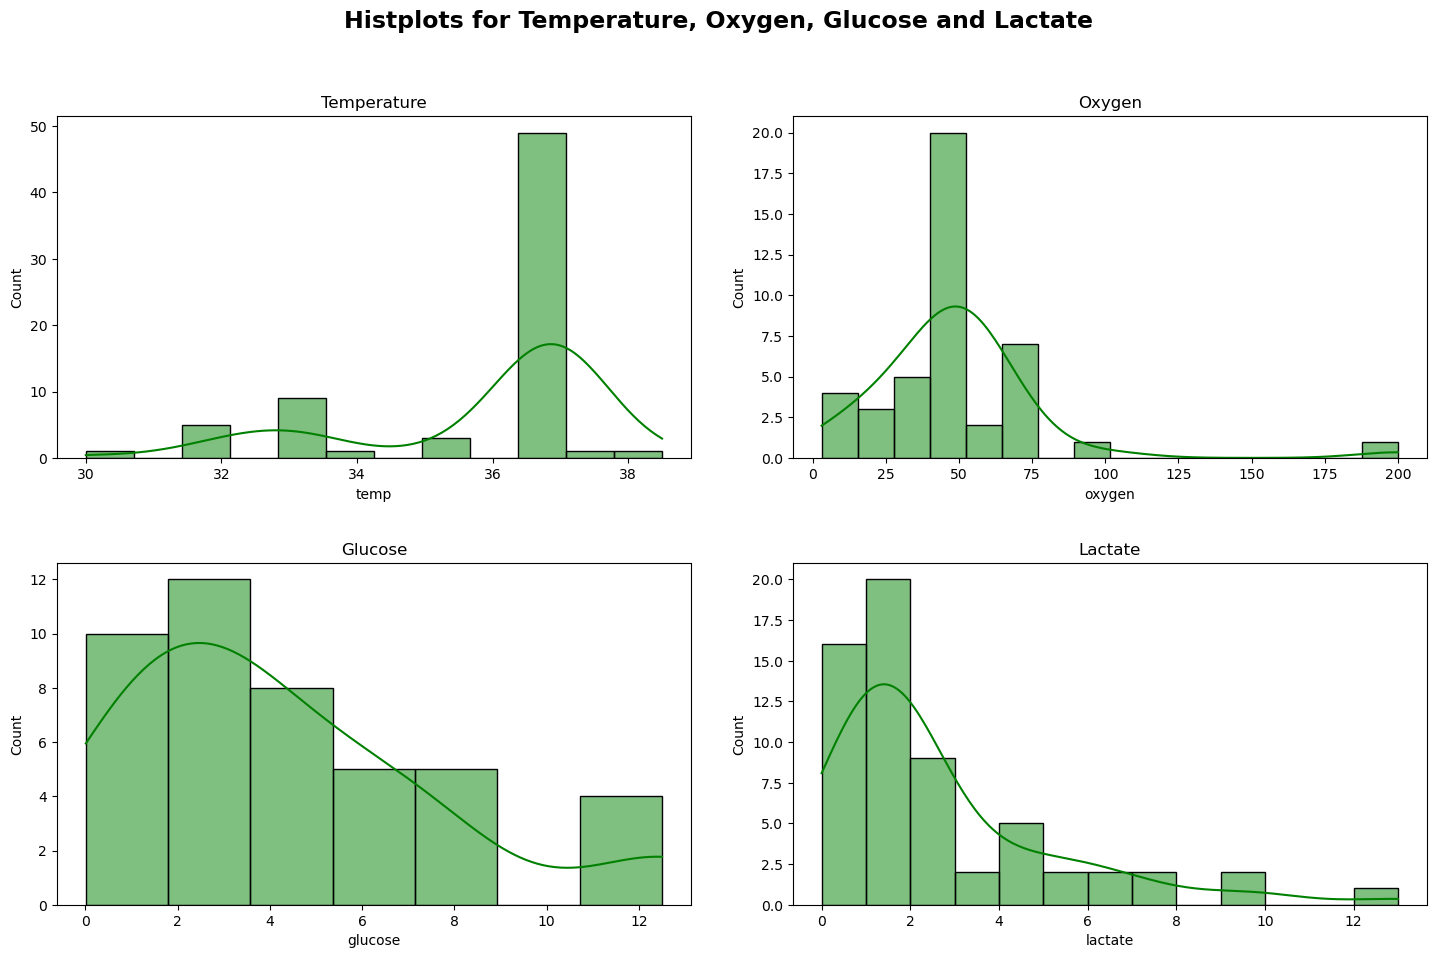

In [5]:
# For the independent variables: 

# create multiple subplots with 2 rows and 2 columns
fig, axs = plt.subplots(2, 2, figsize=[15, 10]) 

fig.suptitle('Histplots for Temperature, Oxygen, Glucose and Lactate', 
             fontweight='bold', size=17)

sns.histplot(df['temp'], 
             kde=True, color='green', label='Data', 
             ax=axs[0,0]
             )
axs[0,0].set_title('Temperature')

sns.histplot(df['oxygen'], 
             kde=True, color='green', label='Data', 
             ax=axs[0,1]
             )
axs[0,1].set_title('Oxygen')

sns.histplot(df['glucose'], 
             kde=True, color='green', label='Data', 
             ax=axs[1,0]
             )
axs[1,0].set_title('Glucose')

sns.histplot(df['lactate'], 
             kde=True, color='green', label='Data', 
             ax=axs[1,1]
             )
axs[1,1].set_title('Lactate')

fig.tight_layout(pad=3.0)
 
plt.show();

Then, distfit (Taskesen, 2020b) was used for hypothesis testing and to find the best probability distribution to model each variable, as shown in Malloy (2023), Mayo (2022) and Raoniar (2022). Spacing between subplots (y=1.01) were adjusted using fig.tight_layout according to GeeksforGeeks spacing (2020).

In [6]:
dists = {} # create a list of columns

for c in df.columns:
    print(c)
    dists[c] = {'fit' : distfit() } # Initialize distfit

# Fit distributions on empirical temp, after dropping missing values
    dists[c]['fit'].fit_transform(df[c].dropna().values)

# Predict the probability of the response variables
    dists[c]['fit'].predict(df[c].dropna().values) 

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 0.783134] [loc=35.860 scale=1.869]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 0.948188] [loc=30.000 scale=5.860]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 0.948188] [loc=-536870882.000 scale=536870912.000]
[distfit] >INFO> [dweibull  ] [0.02 sec] [RSS: 0.788531] [loc=37.000 scale=1.326]


temp


[distfit] >INFO> [t         ] [0.17 sec] [RSS: 0.780162] [loc=35.888 scale=1.836]
[distfit] >INFO> [genextreme] [0.03 sec] [RSS: 0.722435] [loc=35.538 scale=1.930]
[distfit] >INFO> [gamma     ] [0.04 sec] [RSS: 0.795752] [loc=5.315 scale=0.123]
[distfit] >INFO> [lognorm   ] [0.00 sec] [RSS: 0.783135] [loc=-524258.000 scale=524293.860]
[distfit] >INFO> [beta      ] [0.06 sec] [RSS: 0.933302] [loc=29.036 scale=9.464]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 0.858922] [loc=30.000 scale=8.500]
[distfit] >INFO> [loggamma  ] [0.01 sec] [RSS: 0.60393] [loc=37.526 scale=0.502]
[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 0.000768334] [loc=48.814 scale=29.954]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 0.00117616] [loc=3.000 scale=45.814]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 0.00117616] [loc=-8589934589.000 scale=8589934592.000]
[distfit] >INFO> [dweibull  ] [0.04 sec] [RSS: 0.000492482] [loc=50.000 scale=20.512]


oxygen


[distfit] >INFO> [t         ] [0.18 sec] [RSS: 0.00078493] [loc=49.633 scale=30.034]
[distfit] >INFO> [genextreme] [0.12 sec] [RSS: 0.000723832] [loc=36.694 scale=20.926]
[distfit] >INFO> [gamma     ] [0.03 sec] [RSS: 0.000732022] [loc=-10.112 scale=12.138]
[distfit] >INFO> [lognorm   ] [0.00 sec] [RSS: 0.000715069] [loc=-30.166 scale=74.691]
[distfit] >INFO> [beta      ] [0.06 sec] [RSS: 0.000733945] [loc=-9.780 scale=22957440890507.312]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 0.00138934] [loc=3.000 scale=197.000]
[distfit] >INFO> [loggamma  ] [0.04 sec] [RSS: 0.000782758] [loc=-7534.008 scale=1066.847]
[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 0.00905645] [loc=4.213 scale=3.457]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 0.0080698] [loc=0.010 scale=4.203]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 0.0451111] [loc=0.010 scale=0.000]
[distfit] >INFO> [dweibull  ] [0.01 sec] [RSS: 0.00574846] [loc=3.347 scale=2.731]
[di

glucose


[distfit] >INFO> [beta      ] [0.06 sec] [RSS: 0.0206351] [loc=0.010 scale=14.170]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 0.0158071] [loc=0.010 scale=12.490]
[distfit] >INFO> [loggamma  ] [0.04 sec] [RSS: 0.00921095] [loc=-1109.322 scale=148.364]
[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 0.0773511] [loc=2.648 scale=2.597]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 0.0215094] [loc=0.000 scale=2.648]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 0.0215094] [loc=-67108864.000 scale=67108864.000]
[distfit] >INFO> [dweibull  ] [0.02 sec] [RSS: 0.125068] [loc=1.460 scale=1.261]
[distfit] >INFO> [t         ] [0.06 sec] [RSS: 0.0229327] [loc=1.513 scale=0.810]
[distfit] >INFO> [genextreme] [0.03 sec] [RSS: 0.00736499] [loc=1.334 scale=1.138]
[distfit] >INFO> [gamma     ] [0.01 sec] [RSS: 0.0176416] [loc=-0.015 scale=2.135]
[distfit] >INFO> [lognorm   ] [0.03 sec] [RSS: 0.203397] [loc=-0.000 scale=0.000]


lactate


[distfit] >INFO> [beta      ] [0.07 sec] [RSS: 0.0338282] [loc=-0.000 scale=14.825]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 0.133504] [loc=0.000 scale=13.000]
[distfit] >INFO> [loggamma  ] [0.04 sec] [RSS: 0.0789319] [loc=-885.877 scale=117.682]
[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 3.49603e-15] [loc=13569857.143 scale=15675334.263]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 8.80599e-16] [loc=500000.000 scale=13069857.143]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 1.02676e-15] [loc=-39825543.898 scale=40325543.898]
[distfit] >INFO> [dweibull  ] [0.04 sec] [RSS: 1.06385e-15] [loc=8300000.000 scale=7793127.022]
[distfit] >INFO> [t         ] [0.12 sec] [RSS: 2.61851e-15] [loc=-21998.777 scale=10074853.333]


fvcd


[distfit] >INFO> [genextreme] [0.13 sec] [RSS: 6.8234e-15] [loc=500001.301 scale=14.953]
[distfit] >INFO> [gamma     ] [0.04 sec] [RSS: 1.15417e-15] [loc=500000.000 scale=17237035.380]
[distfit] >INFO> [lognorm   ] [0.00 sec] [RSS: 1.63902e-15] [loc=221534.002 scale=6762861.399]
[distfit] >INFO> [beta      ] [0.06 sec] [RSS: 2.20438e-15] [loc=500000.000 scale=103257776.505]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 5.33982e-15] [loc=500000.000 scale=69500000.000]
[distfit] >INFO> [loggamma  ] [0.04 sec] [RSS: 3.61018e-15] [loc=-4988777860.666 scale=675522111.581]


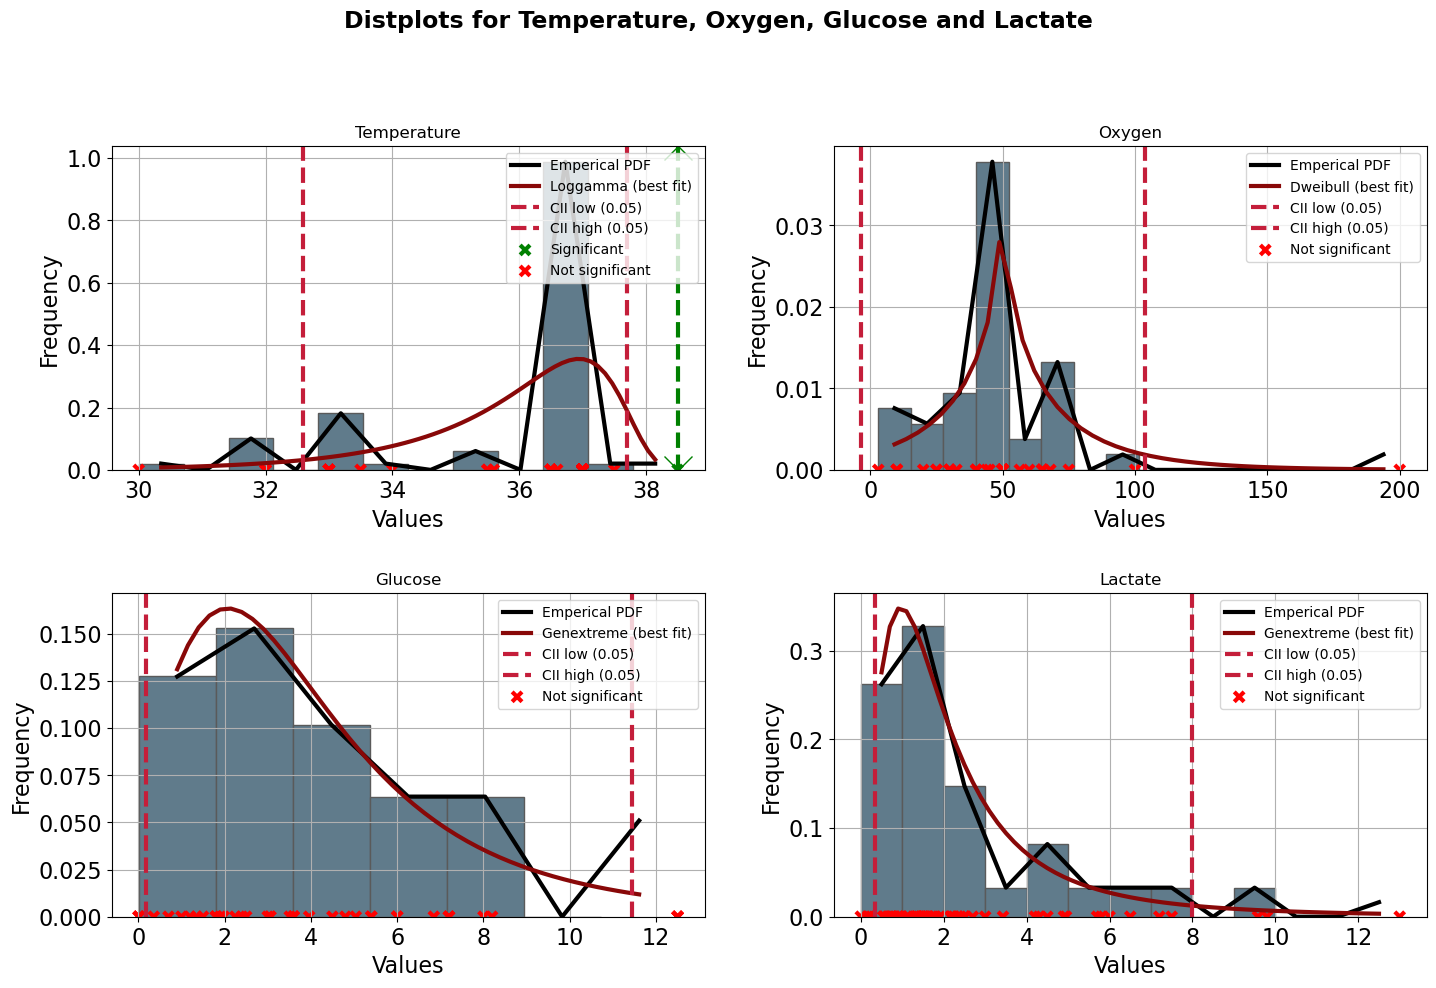

In [7]:
# create multiple subplots with 2 rows and 2 columns

fig, axs = plt.subplots(2, 2, figsize=[15, 10])

fig.suptitle('Distplots for Temperature, Oxygen, Glucose and Lactate', 
             y=1.01, fontweight='bold', size=17)

dists['temp']['fit'].plot(ax=axs[0,0])
axs[0,0].set_title('Temperature')

dists['oxygen']['fit'].plot(ax=axs[0,1])
axs[0,1].set_title('Oxygen')

dists['glucose']['fit'].plot(ax=axs[1,0])
axs[1,0].set_title('Glucose')

dists['lactate']['fit'].plot(ax=axs[1,1])
axs[1,1].set_title('Lactate')

fig.tight_layout(pad=3.0)
 
plt.show();

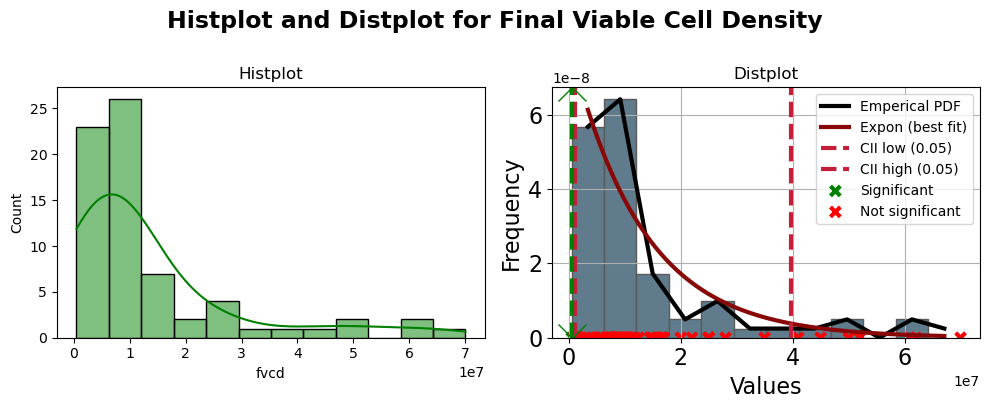

In [8]:
# For the dependent variable fvcd:

# create multiple subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=[10, 4])

fig.suptitle('Histplot and Distplot for Final Viable Cell Density', 
             y=1.01, fontweight='bold', size=17)

sns.histplot(df['fvcd'], 
             kde=True, color='green', label='Data', 
             ax=axs[0]
             )

axs[0].set_title('Histplot')

dists['fvcd']['fit'].plot(ax=axs[1])
axs[1].set_title('Distplot')

fig.tight_layout()
 
plt.show();

The probability distribution for all five columns are summarized in Table 2.

#### Table 2: Probability Distribution for Five Variables 

| **Column**| **Probability Distribution** | 
| :-------: | :------: |
| temp   | Log Gamma   |
| oxygen    |  Double Weibull  |
| glucose    |  Generalized Extreme Value  |
| lactate    |  Generalized Extreme Value |
| fvcd    |  Exponential |

### 2.3 Real-world Situation

In the real-world situation, all these variables would have the following distribution:  

#### Table 3: Probability Distribution for Five Variables 

| **Column**| **Probability Distribution** | **References** |
| :-------: | :------: | :------: |
| temp   | Log Gamma   |  N/A  |
| oxygen    |  Normal  | Ye, Bao and Zhong (2016) |
| glucose    |  Normal  |  Shuler and Fikret Kargı (2002)  |
| lactate    |  Normal | Shuler and Fikret Kargı (2002) |
| fvcd    |  Exponential | Skarstad, Steen and Boye (1983), Morigen and Skarstad (2009) |

There is no data available to support that the probability distribution for temperature in bioreactors is Log Gamma or any other distribution. As seen in most papers, the CHO cells' growing conditions were set to 37°C, where enzymatic activity and protein synthesis occur optimally (Siddiquee et al., 2019, Zagari et al. 2013). The effects of lower temperatures were mostly studied during the research phase (Sunley, Tharmalingam and Butler, 2008), but not during mass-manufacture phase. Temperature causes denaturation of sensitive proteins, thus compromising mAbs quality (Schön and Freire, 2021). 

For dissolved oxygen, glucose and lactate, their probability distributions differ from real bioreactor settings. This could be because biopharmaceutical companies do not disclose their data from their mAb manufacturing processes, hence, only data with irregular intervals and different observation sizes were used as reference in this project. These data are collected from available published scientific research and performed with various CHO cell lines under different experimental settings.

The Law of Large Numbers states that as a sample size or number of independent trials increases, the mean will move closer towards population mean (Wikipedia Contributors, 2019a). According to the Central Limit Theorem, the bigger the sample size, the sampling distribution of the means becomes more normally distributed (Benchmark Six Sigma Forum, 2017, Wikipedia Contributors, 2018, Ganti, 2023, Turney, 2022). Therefore, 70 lines of data with missing values is certainly not enough to approach the Normal distribution.

There are no data available to support exponential distribution for final viable cell density of CHO cells in bioreactors. However, Skarstad, Steen and Boye (1983) and reported exponential growth for *Escherichia coli* cell cycle.

#### 2.3.1 Column temp

Although the RSS (Residual Sum of Squares, or Sum of Squared Errors , SSE) goodness of fit values are not significant (value is over 0.05), the best fitting probability distribution is Log Gamma distribution for column temp. Because it is not available in the numpy random package, I used scipy to generate random numbers (Scipy.stats.loggamma, n.d., GeeksforGeeks, 2019, www.tutorialandexample.com, 2023). According to Chan (1993), Log Gamma distribution becomes more skewed to the right as the shape parameter gets bigger. In this case, it is positively skewed towards the warmer growing temperatures. Log Gamma distribution have applications in survival data analysis (SciSpace - Question, n.d.).

According to Scipy.stats.loggamma (n.d.), the Log Gamma probability density is as follows:

![Log gamma Distribution](loggamma.png)

First, I imported the loggamma.rvs object (Scipy.stats.loggamma, n.d.) and specified the loggamma model in column temp (Taskesen, 2020a). The relevant parameters to fit into Scipy.stats.loggamma (n.d.) for random variates are c, loc and scale. I seeded the scipy random generator according to Kelsey (2013) and Numpy.org random.seed (n.d.).

In [9]:
dists['temp']['fit'].model

{'name': 'loggamma',
 'score': 0.6039295419116101,
 'loc': 37.52586133394318,
 'scale': 0.5017162469149693,
 'arg': (0.315590050551977,),
 'params': (0.315590050551977, 37.52586133394318, 0.5017162469149693),
 'model': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x7f1c4879ee90>,
 'bootstrap_score': 0,
 'bootstrap_pass': None,
 'color': '#e41a1c',
 'CII_min_alpha': 32.587401416831185,
 'CII_max_alpha': 37.701857220729636}

In [10]:
templg = loggamma.rvs(c=0.316, loc=37.526 , scale=0.502, size=200, ) # c is the shape parameter
templg[:10] # display the first 10 elements

array([37.39087066, 36.43226485, 36.38875489, 36.24790129, 35.19286992,
       32.58370503, 36.15704014, 30.22695938, 34.45234629, 36.71060755])

#### 2.3.2 Column oxygen

The best-fitting distribution for column oxygen is the double Weibull distribution at the lowest RSS = 0.000492482. The double Weibull distribution can be left- or right-skewed (Son and Woo, 2009). Among its application are as a survival model for bacterial inactivation studies (Hwang et al., 2019, Hwang, Park and Chung, 2023) and modelling acoustics (Chen et al., 2010). 

However, oxygen was modeled in a Normal (Gaussian) distribution to depict the real world situation in bioreactors. The Normal distribution is bell-shaped because data are symmetrically distributed and contains no skew. It has been used to model cell size (Kashani, Moraveji and Bonakdar, 2021) bacterial and fungi populations in sulfate-reducing bioreactors (Salo and Bomberg, 2022).

The Normal probability density function, according to Wikipedia Contributors (2019b), is below:

![Normal Distribution](normal.png)

Like scipy.stats.norm (Scipy.stats.norm, n.d.), numpy.random.normal (Numpy.random.normal, n.d.) also requires loc (mean) and scale (standard deviation). Instead of calling for the paramaters of the fitted model (Double Weibull), the mean and standard deviation were called using df.mean (Pandas.pydata.mean, n.d.) and df.std (Pandas.pydata.std, n.d.). 

In [11]:
df['oxygen'].mean(), df['oxygen'].std()

(48.81395348837209, 30.308733468655138)

In [12]:
oxygenn = np.random.normal(loc=48.81395348837209, scale=30.308733468655138, size=200)

oxygenn[:10] # display the first 10 elements

array([44.4685212 , 70.18087183, 66.22135964, 72.55351509, 29.17628441,
       20.86052384, 84.5886953 , 49.98907822, 16.87657685, 67.38693759])

#### 2.3.3 Column glucose

The Generalized Extreme Value (GEV) distribution is unavailable in the numpy random package but available in Scipy.stats.genextreme (n.d.). It combines Gumbel, Fréchet and Weibull distributions within the extreme value theory (Wikipedia, 2023). It has been used to model environmental data such as rainfall (Nascimento, Bourguignon and Leão, 2015) and option pricing in the stock market (Markose and Alentorn, 2005).

Column glucose will also be modeled in a Normal (Gaussian) distribution to depict the real world situation in bioreactors. Numpy.random.normal (Numpy.random.normal, n.d.) also requires loc (mean) and scale (standard deviation) ike scipy.stats.norm (Scipy.stats.norm, n.d.). The mean and standard deviation was called using df.mean (Pandas.pydata.mean, n.d.) and df.std (Pandas.pydata.std, n.d.). 

In [13]:
df['glucose'].mean(), df['glucose'].std()

(4.212727272727273, 3.496999620030679)

In [14]:
glucosen = np.random.normal(loc=4.212727272727273, scale=3.496999620030679, size=200)

glucosen[:10] # display the first 10 elements

array([ 4.7663767 ,  1.52251787,  4.22050823, -1.46993103, -0.7476243 ,
        8.71103828,  6.89111342,  9.58194169,  3.3699404 ,  4.89745553])

#### 2.3.4 Column lactate

The Normal distribution as above will also be used for column lactate to depict the real world situation in bioreactors. Like scipy.stats.norm (Scipy.stats.norm, n.d.), numpy.random.normal (Numpy.random.normal, n.d.) also requires loc (mean) and scale (standard deviation). Instead of calling for the paramaters of the fitted model (Generalized Extreme Value), the mean and standard deviation were also called as above.

In [15]:
df['lactate'].mean(), df['lactate'].std()

(2.647868852459016, 2.6188936052934633)

In [16]:
lactaten = np.random.normal(loc=2.647868852459016, scale=2.6188936052934633, size=200)

lactaten[:10] # display the first 10 elements

array([ 1.44828292, -0.89845609,  1.65586693,  1.4053897 ,  2.88114653,
        0.14243581,  0.15262622,  3.33406284, -1.05576456,  0.29483442])

The next step is to view the histograms of simulated data for all columns using seaborn histplot (Waskom, n.d.).

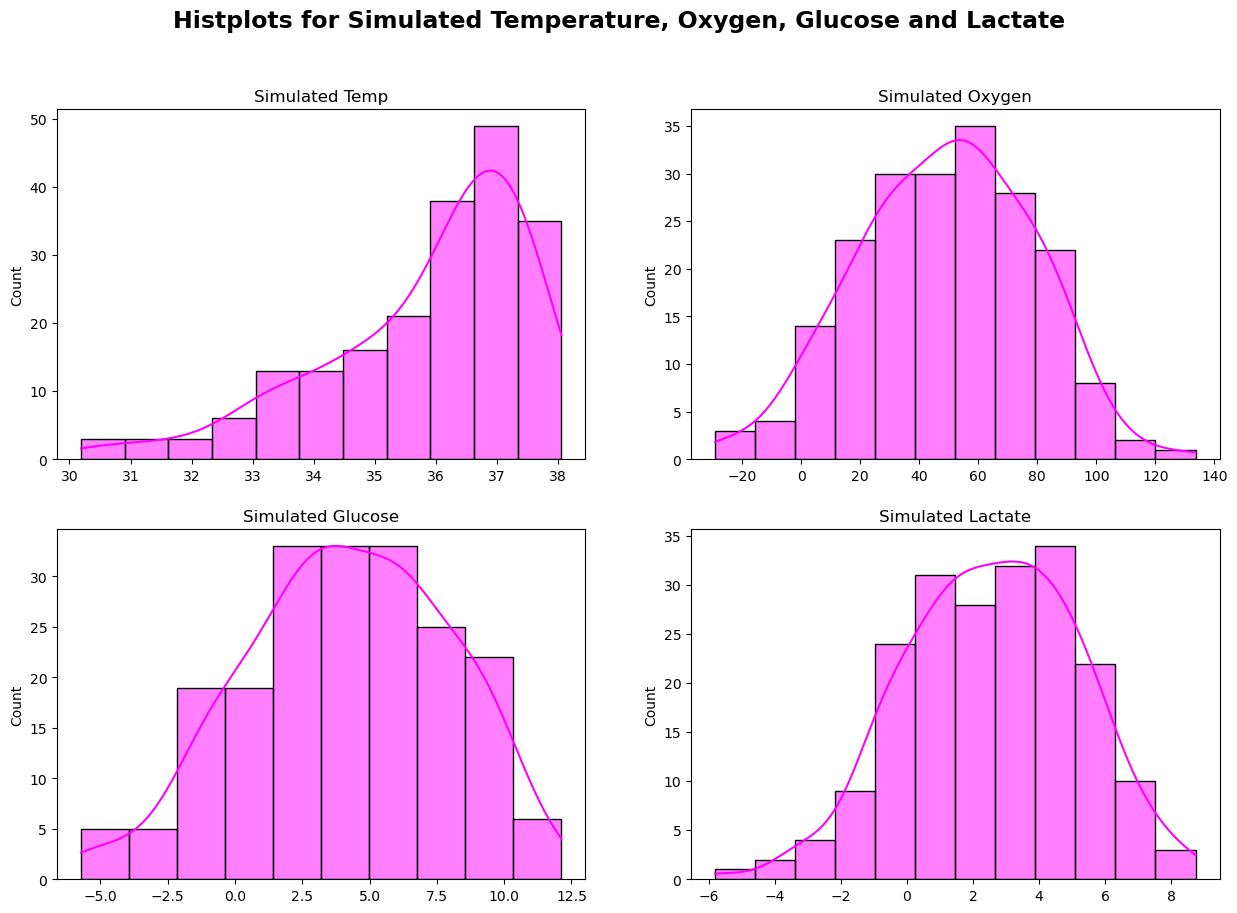

In [17]:
# Histograms for simulated independent variables: 

fig, axs = plt.subplots(2, 2, figsize=[15, 10])

fig.suptitle('Histplots for Simulated Temperature, Oxygen, Glucose and Lactate', 
             fontweight='bold', size=17)

sns.histplot(data=templg, 
             kde=True, color='magenta', label='Data', 
             ax=axs[0,0]
             )
axs[0,0].set_title('Simulated Temp')

sns.histplot(data=oxygenn, 
             kde=True, color='magenta', label='Data', 
             ax=axs[0,1]
             )
axs[0,1].set_title('Simulated Oxygen')

sns.histplot(data=glucosen, 
             kde=True, color='magenta', label='Data', 
             ax=axs[1,0]
             )
axs[1,0].set_title('Simulated Glucose')

sns.histplot(data=lactaten, 
             kde=True, color='magenta', label='Data', 
             ax=axs[1,1]
             )
axs[1,1].set_title('Simulated Lactate');

#### 2.3.5 Column fvcd

Exponential distribution is the best fit for column fvcd. This mirrors the real world where mAbs manufacturers are constantly struggling to grow the highest number of recombinant cells, while maintaining its quality (Montague et al., 2022). Exponential distribution (or negative exponential distribution) is often used to model elapsed time between specific events (Wikipedia Exponential distribution, 2020) . It has been used to model cell migration in cultures (Czirók et al., 1998) and failure times of devices (Balakrishnan et al., 2019). 

According to Numpy.random.exponential (n.d.), the exponential probability density function is as follows:

![Exponential Distribution](exponential.png)

The model in column fvcd (Taskesen, 2020a) was specified to get the relevant parameters to fit Numpy.random.exponential (n.d.) for random variates. Scipy.stats.expon (n.d.) requires loc and scale, but Numpy.random.exponential (n.d.) only requires scale (standard deviation). Alternatively, df.std was called and the scale was chosen from it.


In [18]:
dists['fvcd']['fit'].model

{'name': 'expon',
 'score': 8.805994379550752e-16,
 'loc': 500000.0,
 'scale': 13069857.142857144,
 'arg': (),
 'params': (500000.0, 13069857.142857144),
 'model': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x7f1c48035810>,
 'bootstrap_score': 0,
 'bootstrap_pass': None,
 'color': '#e41a1c',
 'CII_min_alpha': 1170396.0300318017,
 'CII_max_alpha': 39653792.85359728}

In [19]:
df['fvcd'].std()

15788515.041816724

In [20]:
fvcde=np.random.exponential(scale=15788515.041816724, size=200)

fvcde[:10] # display the first 10 elements

array([28400011.03874819, 13643912.38609218,  8876572.61577588,
        4192434.40371717, 10874807.75025389,  8008479.17282294,
        2835210.63914477,  1636978.30011898, 19683300.77529665,
        3407890.95047447])

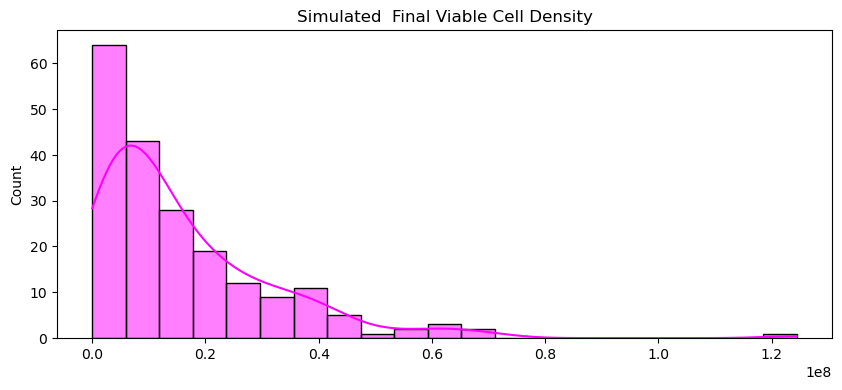

In [21]:
# For the dependent variable fvcd:
fig, axs = plt.subplots(figsize=[10, 4])

sns.histplot(data=fvcde, kde=True, color='magenta', label='Data' )
axs.set_title('Simulated  Final Viable Cell Density');

The multiple arrays were merged into a single dataset using pd.concat, according to Pandas.pydata.org concat (n.d.), Stratis (n.d.) and Chen (2020). Then, the index/column name was created according to GeeksforGeeks df.columns (2019) and generated df.head (Pandas pydata df.head, n.d.) to show the first few lines of the dataset.

In [22]:
concat = pd.concat([
    pd.Series(templg), pd.Series(oxygenn), pd.Series(glucosen),
    pd.Series(lactaten), pd.Series(fvcde)],
    ignore_index=True, axis=1)

concat.columns = ['templg', 'oxygenn', 'glucosen', 'lactaten', 'fvcde']

concat.head(3)

,templg,oxygenn,glucosen,lactaten,fvcde
0,37.390871,44.468521,4.766377,1.448283,2.840001e+07
1,36.432265,70.180872,1.522518,-0.898456,1.364391e+07
2,36.388755,66.221360,4.220508,1.655867,8.876573e+06


Following that, the dataframe was saved into a text file called simcho.csv using convert pandas dataframe to string (Pandas.pydata.org DataFrame.to_csv, n.d.) without the index (Nelamali, 2023). 

In [23]:
concat.to_csv('simcho.csv', index=False)

For further analysis, the dataset sim.csv in the repository was imported and was called it sim. Then, sim.head  (Pandas pydata df.head, n.d.) was performed to show the default first few lines of the dataframe.

In [24]:
sim = pd.read_csv('simcho.csv')
sim.head()

,templg,oxygenn,glucosen,lactaten,fvcde
0,37.390871,44.468521,4.766377,1.448283,2.840001e+07
1,36.432265,70.180872,1.522518,-0.898456,1.364391e+07
2,36.388755,66.221360,4.220508,1.655867,8.876573e+06
3,36.247901,72.553515,-1.469931,1.405390,4.192434e+06
4,35.192870,29.176284,-0.747624,2.881147,1.087481e+07


# 3.0 Analysis

## 3.1 Distribution Plot

Distribution Plots are used to compare observed data and predicted outcomes (or simulated data, in this instance) (Ajay Tech, 2020, UNext, 2023, Lele, 2018). Kdeplot was generated using Seaborn for all columns according to GeeksforGeeks kdeplot (2020) and Waskom (2012a, 2012b). The Kernel Density Estimation (KDE) is used to to estimate the probability density function of a random variable by using the kernel (smooting function) at each data point and to create a smooth curve to perform estimates  (Drapala, 2023). 

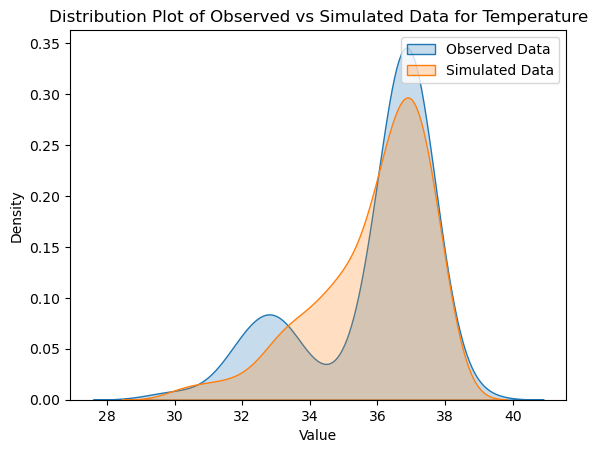

In [25]:
# for temperature:

sns.kdeplot(df['temp'], label='Observed Data', shade=True)
sns.kdeplot(sim['templg'], label='Simulated Data', shade=True)

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Distribution Plot of Observed vs Simulated Data for Temperature')

plt.legend()
plt.show()

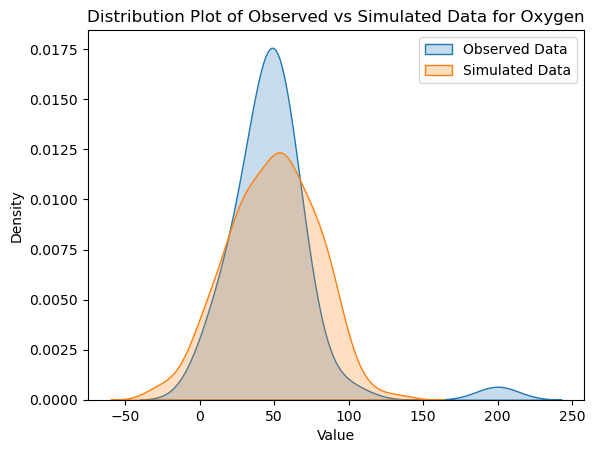

In [26]:
# for oxygen:

sns.kdeplot(df['oxygen'], label='Observed Data', shade=True)
sns.kdeplot(sim['oxygenn'], label='Simulated Data', shade=True)

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Distribution Plot of Observed vs Simulated Data for Oxygen')

plt.legend()
plt.show()

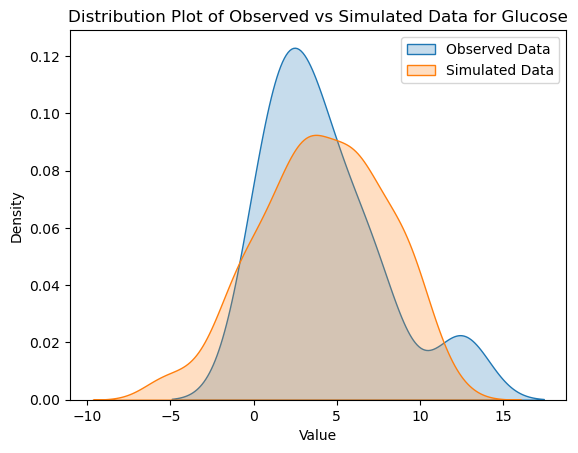

In [27]:
# for glucose:

sns.kdeplot(df['glucose'], label='Observed Data', shade=True)
sns.kdeplot(sim['glucosen'], label='Simulated Data', shade=True)

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Distribution Plot of Observed vs Simulated Data for Glucose')

plt.legend()
plt.show()

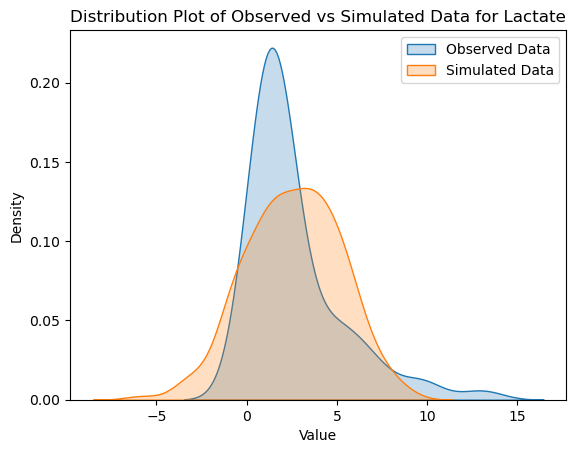

In [28]:
# for lactate:

sns.kdeplot(df['lactate'], label='Observed Data', shade=True)
sns.kdeplot(sim['lactaten'], label='Simulated Data', shade=True)

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Distribution Plot of Observed vs Simulated Data for Lactate')

plt.legend()
plt.show()

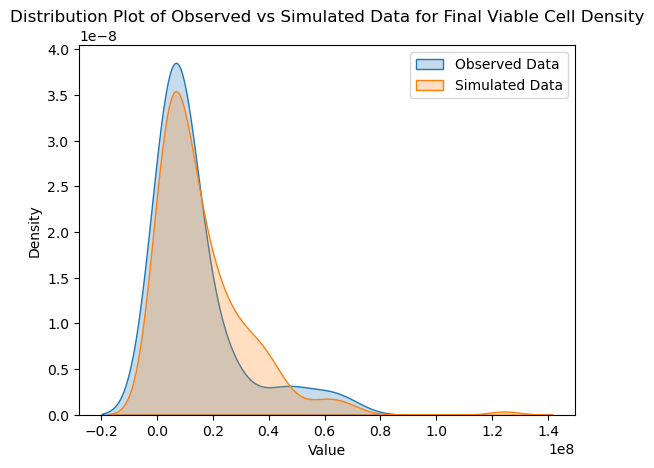

In [29]:
# for final viable cell density (fvcd):

sns.kdeplot(df['fvcd'], label='Observed Data', shade=True)
sns.kdeplot(sim['fvcde'], label='Simulated Data', shade=True)

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Distribution Plot of Observed vs Simulated Data for Final Viable Cell Density')

plt.legend()
plt.show()

Kdeplots for observed and simulated data look similar for temperature and final viable cell density. 

## 3.2 Scatter Plot

A scatter plot is a data visualization method that shows relationship between 2 variables (Wikipedia Contributors, 2019d). For continuous variables, one variable is on the x axis, and the other on the y axis (www.jmp.com Scatter Plot, n.d.). 

I generated a seaborn pairplot according to seaborn.pydata.org (n.d.), Koehrsen (2018), Ali (2023) and Stack Overflow (2018). I picked kde for diag_kind for the kind of plot for the diagonal subplots. Spacing between title and plots (y=1.03) were adjusted using fig.tight_layout according to GeeksforGeeks spacing (2020).

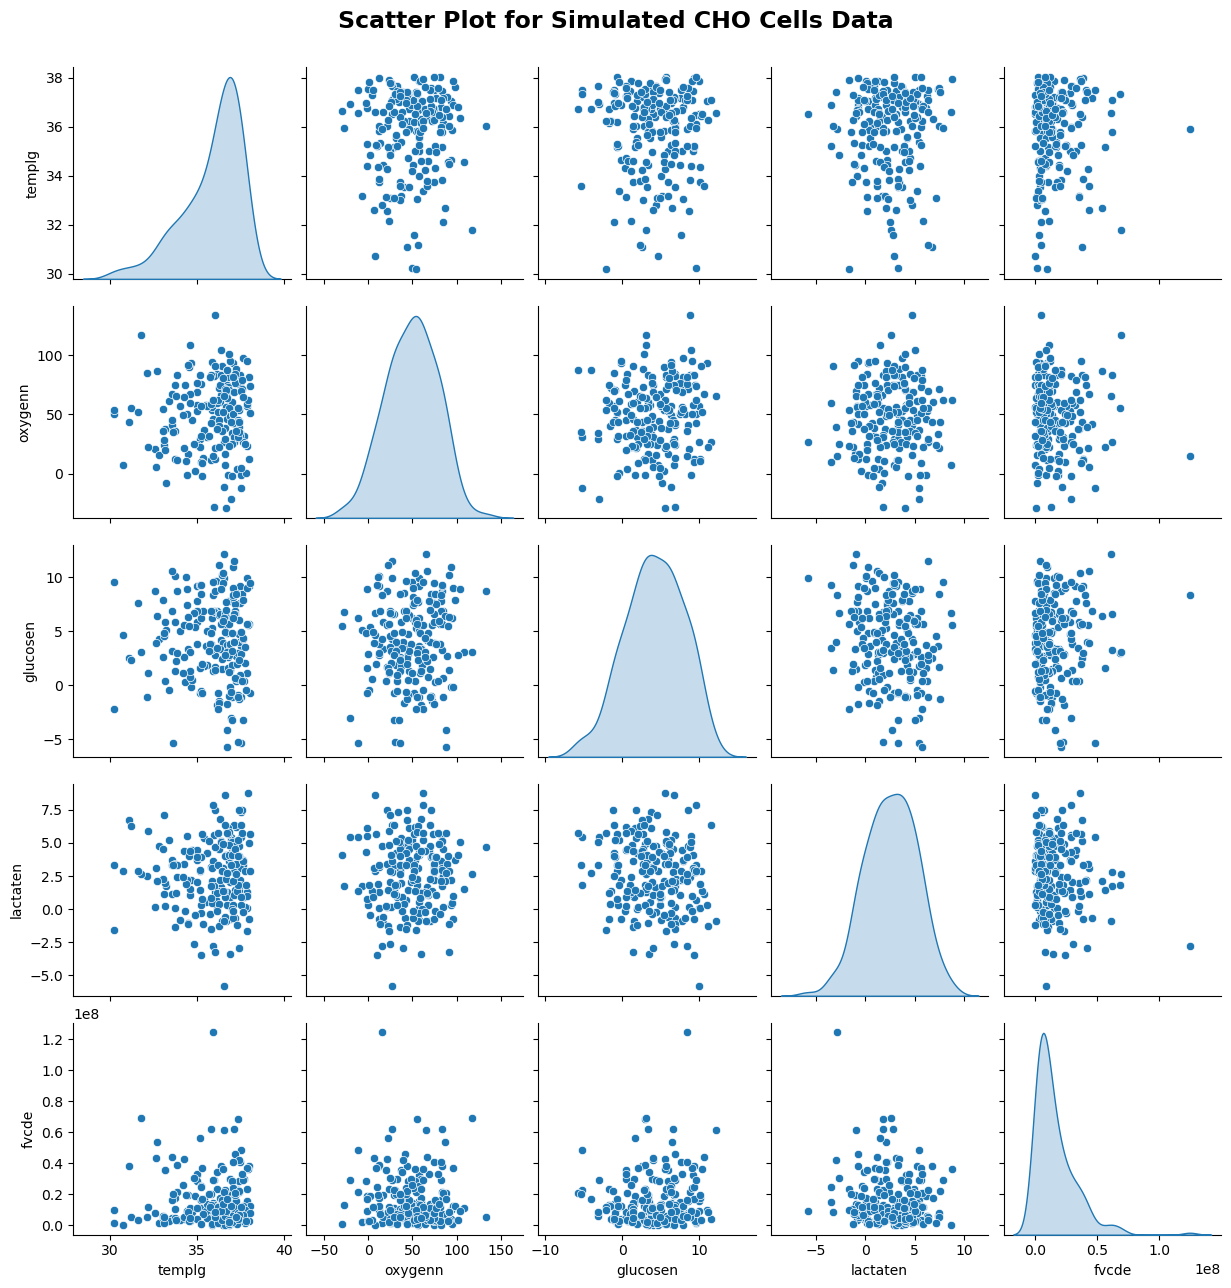

In [30]:
sns.pairplot(sim, diag_kind = 'kde')
plt.suptitle('Scatter Plot for Simulated CHO Cells Data', y=1.03,
             fontweight='bold', size=17);

Output shows that glucose and lactate have a relationship with final viable cell density. Glucose and lactate also have a curvilinear relationship with each other.

# 3.3 Box Plot

A Box Plot contains the distribution divided into quartiles where the box represents values closest to the median while the whiskers represent outliers (Banghart, n.d.).  

A Box Plot was generated according to pandas.pydata.org boxplot (n.d.). For different y-axes, ax.twinx was used according to ImportanceOfBeingErnest (2017) and Viola (2023).

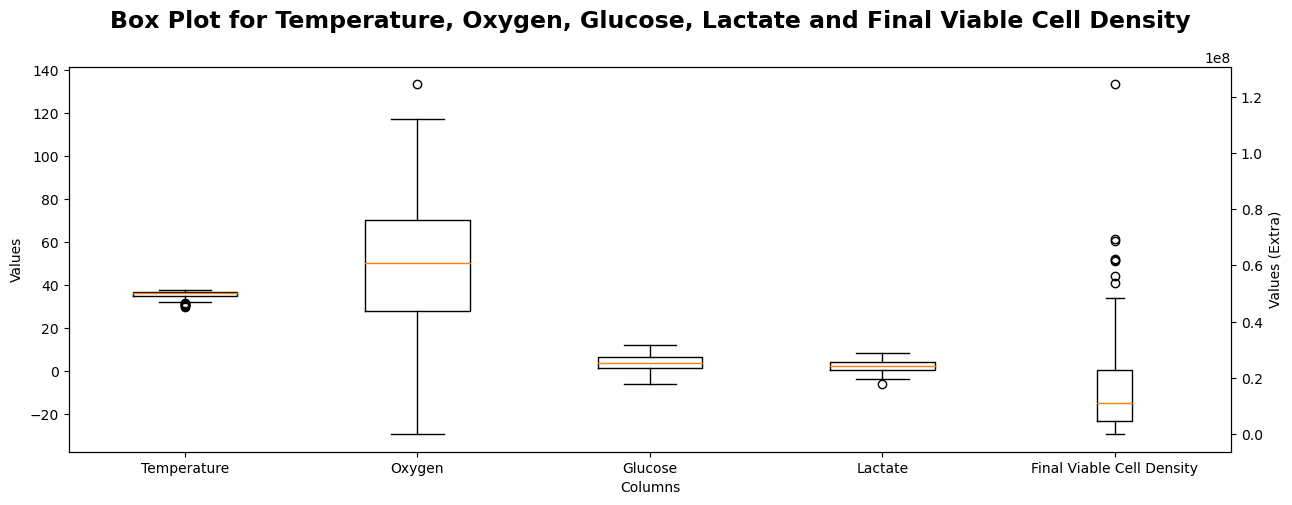

In [31]:
fig, ax = plt.subplots(figsize=(15,5))

# create box plots for each dataset on the first y-axis
ax.boxplot([templg, oxygenn, glucosen, lactaten], positions=[1, 2, 3, 4], 
           labels=['Temperature', 'Oxygen', 'Glucose', 'Lactate'])

# set labels and title for the first y-axis
ax.set_xlabel('Columns')
ax.set_ylabel('Values')

# create a second y-axis
ax2 = ax.twinx()

# create a box plot for fvcde on the second y-axis
ax2.boxplot(fvcde, positions=[5], labels=['Final Viable Cell Density'])

# set labels and title for the second y-axis
ax2.set_ylabel('Values (Extra)')

plt.title('Box Plot for Temperature, Oxygen, Glucose, Lactate and Final Viable Cell Density', 
          y=1.08, fontweight='bold', size=17)
plt.show()

# the x-axis is too small to accommodate the labels. increase the width. i tried, could find one. i tried figsize but error

In reality, dissolved oxygen could either be present or absent (0%). However, negative values are sometimes achieved due to instrument error, calibration error or other anomalies in the data collection process, such as human error. Sample contamination and extreme environmental conditions, such as high temperatures or pressures, may also affect the accuracy of the measurements.

Output shows that the median for temperature is around 30-35°C with outliers in the lower temperatures, glucose around 10g/L and lactate is around 5g/L with outliers under 25g/L.

The median for DO is 50% with a Normal distribution (not skewed). However, I reject that the fact that the DO data was extremely dispersed with the maximum over 100% and contains negative DO values.

There also seems to be relationship between temperature and DO, and between glucose and lactate.

The Final Viable Cell Density distribution is positively skewed (skewed right) with 50% of its data below 2x10<sup>7</sup> cells. The maximum is just under 4x10<sup>7</sup> cells with outliers under 6x10<sup>7</sup> cells.


## 3.4 Violin Plot

The Violin plot is hybrid of a box plot and a kernel density plot and it compares probability disributions between two variables (Wikipedia Violin Plot, 2020, Seaborn.pydata.org violinplot, n.d.). Computed using KDE, the curve's width indicates frequency in each section (Yi, 2021). Therefore, the Violin Plot shows both the summary statistics and each variable's density, unlike the box plot which only depicts the summary statistics (Carron, 2021).

For multiple Violin Plots, plotly.express and plotly.graph_objects (Plotly.com Graph Objects, n.d.) were imported. Violin plots for multiple traces were generated according to Plotlygraphs (2019), R (2020), Plotly.com Violin (n.d.) and GeeksforGeeks (2021). Trace is a graph object in each plot's data (Plotly.com Traces, n.d.). 

Stack Overflow (2023), Paul (2011), Hashcode55 (2017), Matplotlib.org different scales (n.d.) and Ciortan (2019) were used for reference for multiple Violin Plots on different y-axes.

In [32]:
# create violin traces for each dataset on the first y-axis
tracetemp = go.Violin(y=templg, name='Temperature', box_visible=True, line_color='blue')
traceoxyg = go.Violin(y=oxygenn, name='Oxygen', box_visible=True, line_color='orange')
tracegluc = go.Violin(y=glucosen, name='Glucose', box_visible=True, line_color='green')
tracelact = go.Violin(y=lactaten, name='Lactate', box_visible=True, line_color='purple')

# create a violin trace for fvcde on the second y-axis
tracefvcde = go.Violin(y=fvcde, name='Final viable cell density', 
                       box_visible=True, line_color='salmon', yaxis='y2')

# create layout with two y-axes
layout = go.Layout(
    title='Multiple Violin Plots of Temperature, Oxygen, Glucose, Lactate and Final Viable Cell Density',
    xaxis=dict(title='Simulated Columns'),
    yaxis=dict(title='Values'),
    yaxis2=dict(title='Values for final viable cell density', overlaying='y', side='right'),
    legend=dict(x=0, y=1)
)

fig = go.Figure(data=[tracetemp, traceoxyg, tracegluc, tracelact, tracefvcde], layout=layout)
fig.show()

Results from the Violin Plot show that the median for glucose and lactate are about the same, and both have outliers on the higher end. The data for temperature, oxygen, glucose and lactate are highly concentrated around the median. 

The distribution for final viable cell density is skewed right with data highly concentrated around the first quartile.

## 3.5 Pearson Correlation

The Pearson correlation coefficient (PCC) for sample measures linear correlation between two sets of data (Wikipedia Contributors, 2019c). The correlation is considered strong when it is closer to 1 (Statistics Solutions, 2021). The formula according to Wikipedia Contributors (2019c) is shown below:

![sample Pearson Correlation Coefficient](samplepearson.png)

sim.corr was executed according to Pandas.pydata.org DataFrame.corr (n.d.). and Stojiljković (n.d.). The upper triangle of the matrix was eliminated using numpy.tril according to Alexandru (2017).

In [33]:
corr = sim.corr(method="pearson")  # instantiate a corr method and call it corr 
bool_upper_matrix = np.tril(np.ones(corr.shape)).astype(bool)  # eliminate upper triangle

corr = corr.where(bool_upper_matrix) 
print('\nPearson Correlation by column\n',corr)


Pearson Correlation by column
             templg   oxygenn  glucosen  lactaten  fvcde
templg    1.000000       NaN       NaN       NaN    NaN
oxygenn   0.045437  1.000000       NaN       NaN    NaN
glucosen -0.029442  0.086185  1.000000       NaN    NaN
lactaten  0.025695  0.041114 -0.170361  1.000000    NaN
fvcde     0.000790 -0.057763  0.104331 -0.119713    1.0


Results show that glucose and lactate have a strong correlation each other and with the final viable cell density. 

## 3.6 Multiple Linear Regression

Linearregression was imported from sklearn (Scikit-learn Developers, 2019), train_test_split from sklearn.model_selection (Scikit-learn, 2018) and r2_score from sklearn.metrics for model accuracy Scikit-learn.org r2_score (n.d.).

After changing the dataframe to numpy array (Pandas.pydata.org to_numpy, n.d.), Multiple linear regression was performed according to Stojiljković (2019), K (2022) and Kim (2019).

In [34]:
# Define X (input, independent) 

x=sim.iloc[:,:4] # or
# df[:,:-1] # get everything except the last column (4)
x

,templg,oxygenn,glucosen,lactaten
0,37.390871,44.468521,4.766377,1.448283
1,36.432265,70.180872,1.522518,-0.898456
2,36.388755,66.221360,4.220508,1.655867
3,36.247901,72.553515,-1.469931,1.405390
4,35.192870,29.176284,-0.747624,2.881147
...,...,...,...,...
195,34.208158,49.545060,1.157813,2.398883
196,37.514239,5.180341,4.916061,0.898241
197,33.101201,28.676781,4.876748,1.169110
198,37.568033,79.212320,0.435902,5.781723


In [35]:
# Define Y (output, dependent)

y=sim.iloc[:,4] # or
# y=sim.iloc[:,-1] # get everything in the last column
y

0      2.840001e+07
1      1.364391e+07
2      8.876573e+06
3      4.192434e+06
4      1.087481e+07
           ...     
195    2.596618e+07
196    1.174757e+07
197    5.402335e+06
198    3.292736e+07
199    5.150890e+06
Name: fvcde, Length: 200, dtype: float64

In [36]:
# x to numpy array

tl = sim['templg'].to_numpy()
#tl
ow = sim['oxygendw'].to_numpy()
#ow
gx = sim['glucosegx'].to_numpy()
#gx
lx = sim['lactategx'].to_numpy()
lx # show one example

KeyError: 'oxygendw'

In [ ]:
# y to numpy array. Let y be 1D.

yn = sim['fvcde'].to_numpy()
yn

.reshape()  was called on x because it has to be a 2D array with at least 2 columns and multiple rows (Numpy.org reshape, n.d.). 

Let y be 1D in numpy array.

In [ ]:
# make x 2D
tlr = tl.reshape(-1,1)
#tlr
owr = ow.reshape(-1,1)
#owr
gxr = gx.reshape(-1,1)
#gxr
lxr = lx.reshape(-1,1)
lxr

Then, the sim dataset was sliced into Train and Test datasets using train_test_split according to Scikit-learn (2018). The training set is used to train a model, while the test set tests the trained model for model validation (Google Developers, 2019, Shiksha.com, 2020). 

test_size=0.2 means that the dataset was split into 20% test set and 80% train set.

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
# View the shapes of split data.

print("x_train:",x_train.shape)
print("x_test:",x_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

In [ ]:
# Train the model

lr = LinearRegression()
lr.fit(x_train,y_train)

In [ ]:
# Predict the Test

y_pred_lr=lr.predict(x_test)
y_pred_lr

Next, the model was evaluated using R<sup>2</sup> score.

R<sup>2</sup> is the coefficient of determination between the observed y and the predicted y, and the closer the value is to 100%, the better the regression model fits the observation (Frost, 2018). The R<sup>2</sup> value was generated according to GeeksforGeeks R2 score (2020) and Atha (2020).

In [ ]:
# Evaluate the model

Accuracy=r2_score(y_test,y_pred_lr)*100
print(" Accuracy of the model is %.2f" %Accuracy)

Results of Multiple Linear Regression shows that the accuracy of the model is 99.03, which means that 99.03% of the data fit the regression model.

The Final Viable Cell Density can also be predicted at different independent variable values (www.w3schools.com Multiple Regression, n.d.). Under strictly controlled mAb manufacturing conditions, before a parameter moves beyond an acceptable limit, steps could be taken to maintain an ideal growing condition, thus preventing the batch quality from becoming suboptimal. For example, at 38°C, 65% DO, glucose 10g/L and lactate 5g/L:

In [ ]:
predictedfvcde = lr.predict([[38, 65, 10, 5]]) # make predictions on the X_test data (unseen data)
# model does not know the statistics on the test data, only on train data

print(predictedfvcde) 

Results show that at 38°C, 65% DO, glucose 10g/L and lactate 5g/L, the predicted Final Viable Cell Density is 3.22x10<sup>7</sup> cells.

Finally, after importing plotly.express, a scatter plot with Ordinary Least Squares (OLS) regression trendline was generated as shown in Plotly.com Trendlines (n.d.). OLS describes the relationship between one or more independent variables and a dependent variable by minimizing the sum of the squared differences between the predicted values on the line and the actual data points to find the best-fitting line through a set of data points (XLSTAT, 2017).

In [ ]:
px.scatter(y_test, y_pred_lr, trendline='ols', 
           title="Log-transformed Fit on Final Viable Cell Density Linear Axes")

## 4.0 Conclusions

A simulated dataset called simcho.csv containing 5 variables (4 independent, 1 dependent) and 200 data points each was generated using numpy random package and scipy stats based on the distribution of observed data. Distribution Plots of the observed and simulated data shows that the distributions are somewhat similar. 

While in the real world where dissolved oxygen, glucose and lactate would have a Normal distribution, the discrepancy could be due to the fact that these observed data were taken at irregular intervals with small and different observation sizes and only compiled from available publications. These scientific laboratory research were also done under different experimental conditions with different CHO cell lines. 

The Scatter Plot, Violin Plot and Pearson Correlation show that glucose and lactate have a curvilinear relationship with the final viable cell density and with each other. This result is logical because the higher amount of glucose is present, the more it is utilized, resulting in a higher production of cells and a higher amount of waste (lactate). The Multiple Linear Regression shows that 99.03% of the data fit the regression model and predictions can be made when parameter values change.

## 5.0 References



***

## End of Project 1